In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [4]:
!pip install scikeras

In [66]:
#Script to obtain data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Libraries to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score


In [67]:
#Reading the csv datafile (data_moods.csv)
df = pd.read_csv("C:/Users/Sanyam/Downloads/Spotify-Machine-Learning-master/Spotify-Machine-Learning-master/data/data_moods.csv")

In [68]:
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [69]:
#Selecting the mood's column and using the functions
col_features = df.columns[6:-3]

#Normalize the features
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [70]:
#Encode the categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

#Split train and test data with a test size of 20%
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)

In [71]:
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [72]:
#This function creates the structure of the Neural Network
def base_model():
    #Creating the model
    model = Sequential()
    
    #Adding 1 layer with 8 nodes,input of 4 dim with relu function (input)
    model.add(Dense(8,input_dim=10,activation='relu'))
    
    #Adding 1 layer with output 3 and softmax function(output)
    model.add(Dense(4,activation='softmax'))
    
    #Compiling the model using logistic loss function and adam optimizer
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [95]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 8)                 88        
                                                                 
 dense_81 (Dense)            (None, 4)                 36        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [86]:
#Configure the estimator with 300 epochs and 200 batchs, build_fn function takes the function
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

In [97]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Accuracy: 78.43% (2.53%)


In [90]:
#Training the model with the train data
estimator.fit(X_train,Y_train)

#Predicting the model with the test data
y_preds = estimator.predict(X_test)

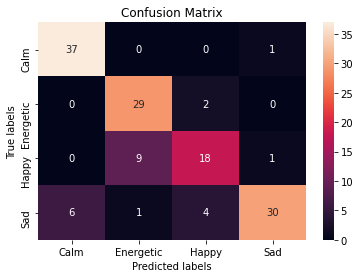

Accuracy Score 0.8260869565217391


In [25]:
#Creating a confusion matrix using test data and predictions
cm = confusion_matrix(Y_test,y_preds)

#Plotting the confusion matrix
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

#Displaying the accuracy of the score
print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [92]:
def predict_mood(id_song):
    #Join the model and the MinMaxScaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(id_song)
    
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    
    #Obtain the name of the song and the artist
    name_song = preds[0][0]
    artist = preds[0][2]
    
    #Store the name,artist,and mood of the song to print
    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    

In [93]:
predict_mood('0VjIjW4GlUZAMYd2vXMi3b')

Blinding Lights by The Weeknd is a ENERGETIC song


In [29]:
predict_mood('7FlHNJT4TC120CDvFOHzei')

Rewrite The Stars by Various Artists is a HAPPY song


In [30]:
predict_mood('251PNRmJU9KcUnFQAB5t6I')

Kal Ho Naa Ho by Shankar-Ehsaan-Loy is a SAD song


In [31]:
predict_mood('3fPgIknlkDWXs1l2noKZbp')

Kar Gayi Chull by Badshah is a HAPPY song


In [58]:
predict_mood('251PNRmJU9KcUnFQAB5t6I')

Kal Ho Naa Ho by Shankar-Ehsaan-Loy is a SAD song


In [65]:
predict_mood('24FprytnP9KMqH01aPR2N5')

Heaven by Emilee is a SAD song


In [34]:
!pip install pydot

In [36]:
!pip install graphviz

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [27]:
import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util


client_id='b6da93c771b94eb584ca290ab8c1a105'
client_secret='1d0da28e84374eab84687e8ce9a020cd'
redirect_uri='http://localhost:8891/callback/'
username = '11178035349'
scope = 'playlist-modify-public'

#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access to  the Spotify User's Playlist, Favorite Songs, etc. 
token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri) 
spt = spotipy.Spotify(auth=token)


def get_albums_id(ids):
    album_ids = []
    results = sp.artist_albums(ids)
    for album in results['items']:
        album_ids.append(album['id'])
    return album_ids

def get_album_songs_id(ids):
    song_ids = []
    results = sp.album_tracks(ids,offset=0)
    for songs in results['items']:
        song_ids.append(songs['id'])
    return song_ids

def get_songs_features(ids):

    meta = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    ids =  meta['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return track,columns

def get_songs_artist_ids_playlist(ids):
    playlist = sp.playlist_tracks(ids)
    songs_id = []
    artists_id = []
    for result in playlist['items']:
        songs_id.append(result['track']['id'])
        for artist in result['track']['artists']:
            artists_id.append(artist['id'])
    return songs_id,artists_id

def download_albums(music_id,artist=False):
    
    if artist == True:
        ids_album = get_albums_id(music_id)
    else:
        if type(music_id) == list:
            ids_album = music_id
        elif type(music_id) == str:
            ids_album = list([music_id])

    tracks = []
    for ids in ids_album:
        #Obtener Ids de canciones en album
        song_ids = get_album_songs_id(ids=ids)
        #Obtener feautres de canciones en album
        ids2 = song_ids
        
        print(f"Album Length: {len(song_ids)}")
         
        time.sleep(.6)   
        track, columns = get_songs_features(ids2)
        tracks.append(track)

        print(f"Song Added: {track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        
    clear_output(wait = True)
    print("Music Downloaded!")
 
    return tracks,columns

def download_playlist(id_playlist,n_songs):
    songs_id = []
    tracks = []

    for i in range(0,n_songs,100):
        playlist = spt.playlist_tracks(id_playlist,limit=100,offset=i)
        
        for songs in playlist['items']:
            songs_id.append(songs['track']['id'])
    
    counter = 1
    for ids in songs_id:
        
        time.sleep(.6)
        track,columns = get_songs_features(ids)
        tracks.append(track)

        print(f"Song {counter} Added:")
        print(f"{track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        counter+=1
    
    clear_output(wait = True)
    print("Music Downloaded!")

    return tracks,columns